In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch12. 데이터 시각화 </font><b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
# 1절. matplotlib
    - https://pypi.org/project/matplotlib/
    - https://matplotlib.org/stable/api/index

In [3]:
import matplotlib

matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [5]:
# 시작전 설정
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

#한글설정
# plt.rc('font', family='Malgun Gothic')
# plt.rc('axes', unicode_minus=False)

# warning(경고) 안보이게
# importwarnings
# warnings.filterwarnings(action='ignore')

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 출력 및 저장

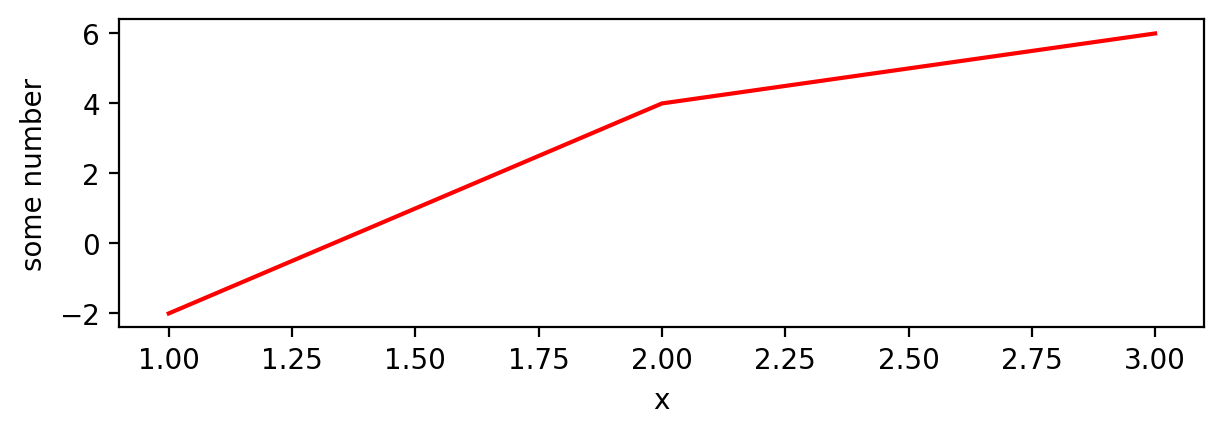

In [9]:
x = [1,2,3] # 1)데이터 준비
y = [-2,4,6]
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성
plt.plot(x,y, color='red') # 3) 그래프 함수
plt.ylabel('some number') # 4) 커스터마이징
plt.xlabel('x')
plt.show() # 5) 그래프 화면 출력 cf) plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

In [11]:
import numpy as np
x = np.arange(0,10,0.01)
len(x)

1000

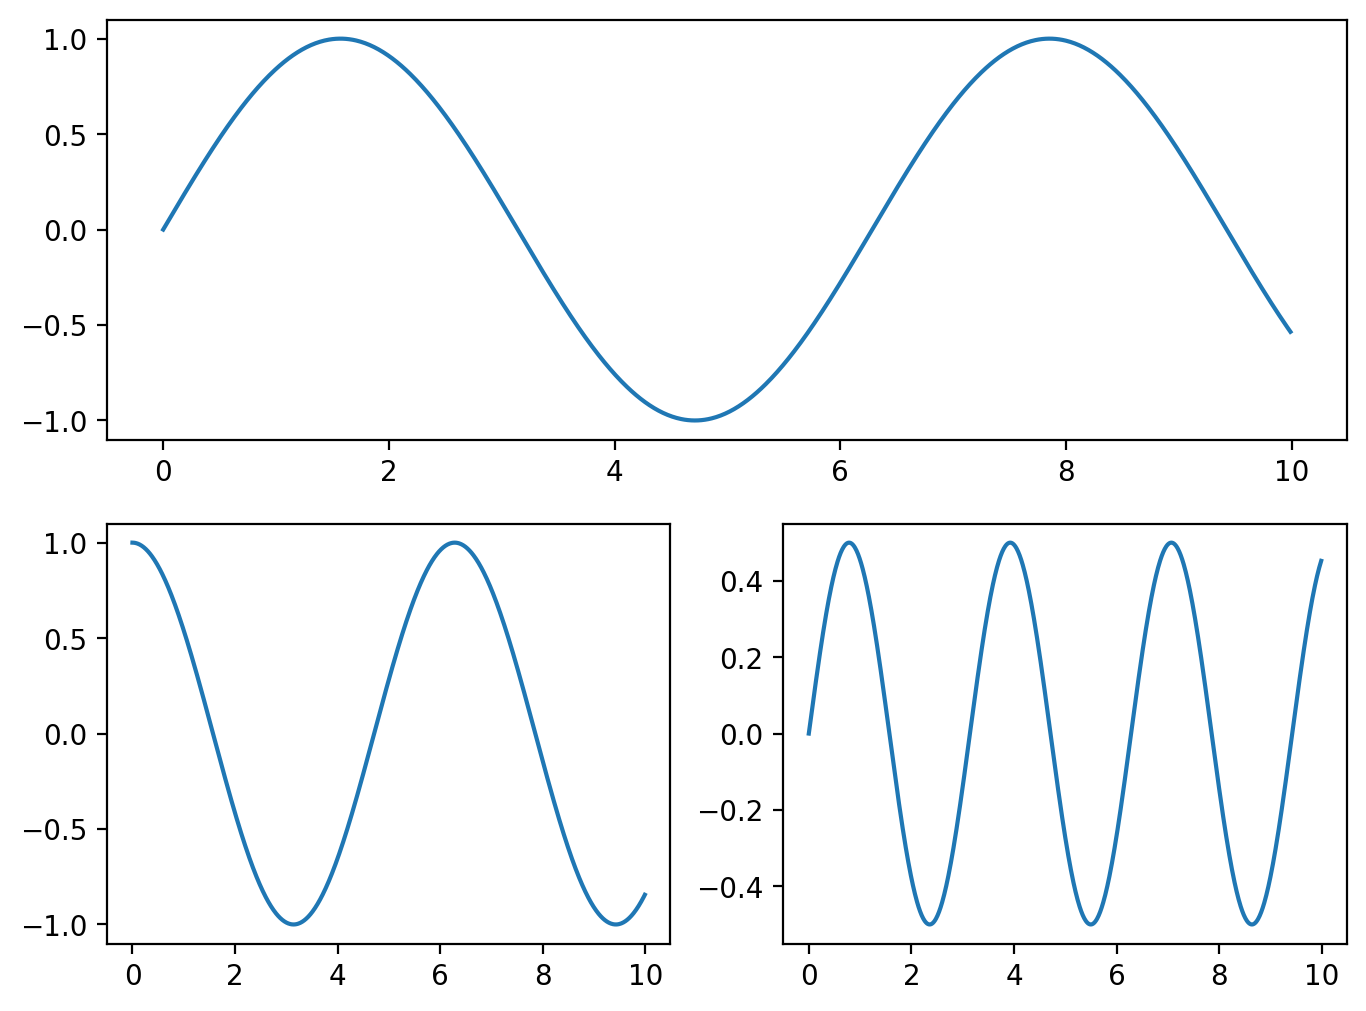

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.subplot(2,1, 1); plt.plot(x, np.sin(x))
plt.subplot(2,2, 3); plt.plot(x, np.cos(x))
plt.subplot(2,2, 4); plt.plot(x, np.sin(x)*np.cos(x))

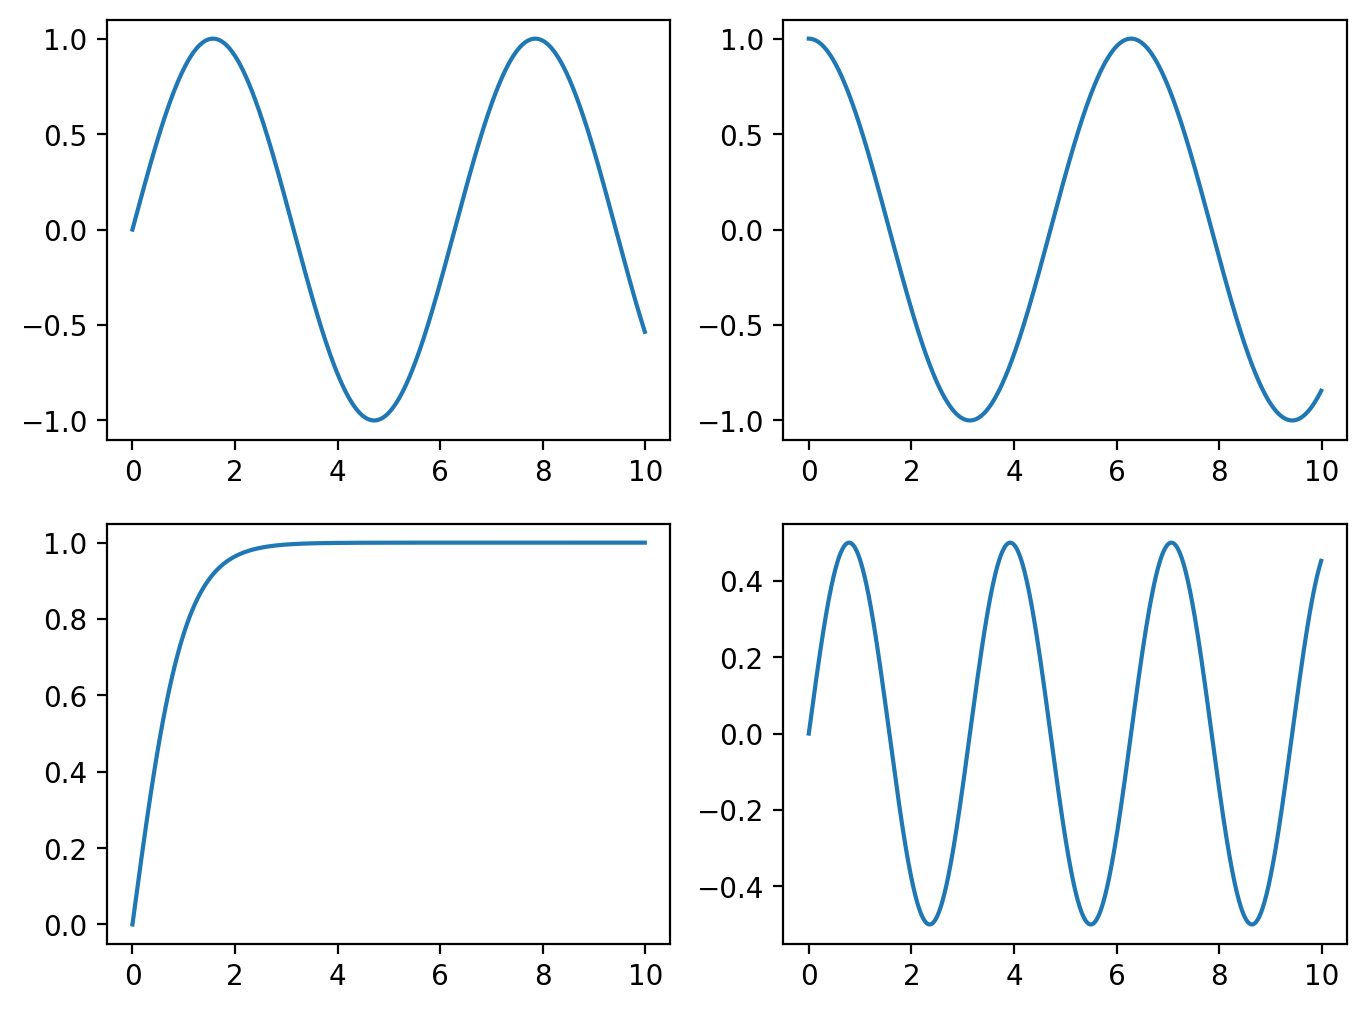

In [21]:
plt.figure(figsize=(8,6))
plt.subplot(2,2, 1); plt.plot(x, np.sin(x))
plt.subplot(2,2, 2); plt.plot(x, np.cos(x))
plt.subplot(2,2, 3); plt.plot(x, np.tanh(x))
plt.subplot(2,2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplot()함수로 서브플롯 추가
- 교안(14page) https://wikidocs.net/92085

<function matplotlib.pyplot.show(close=None, block=None)>

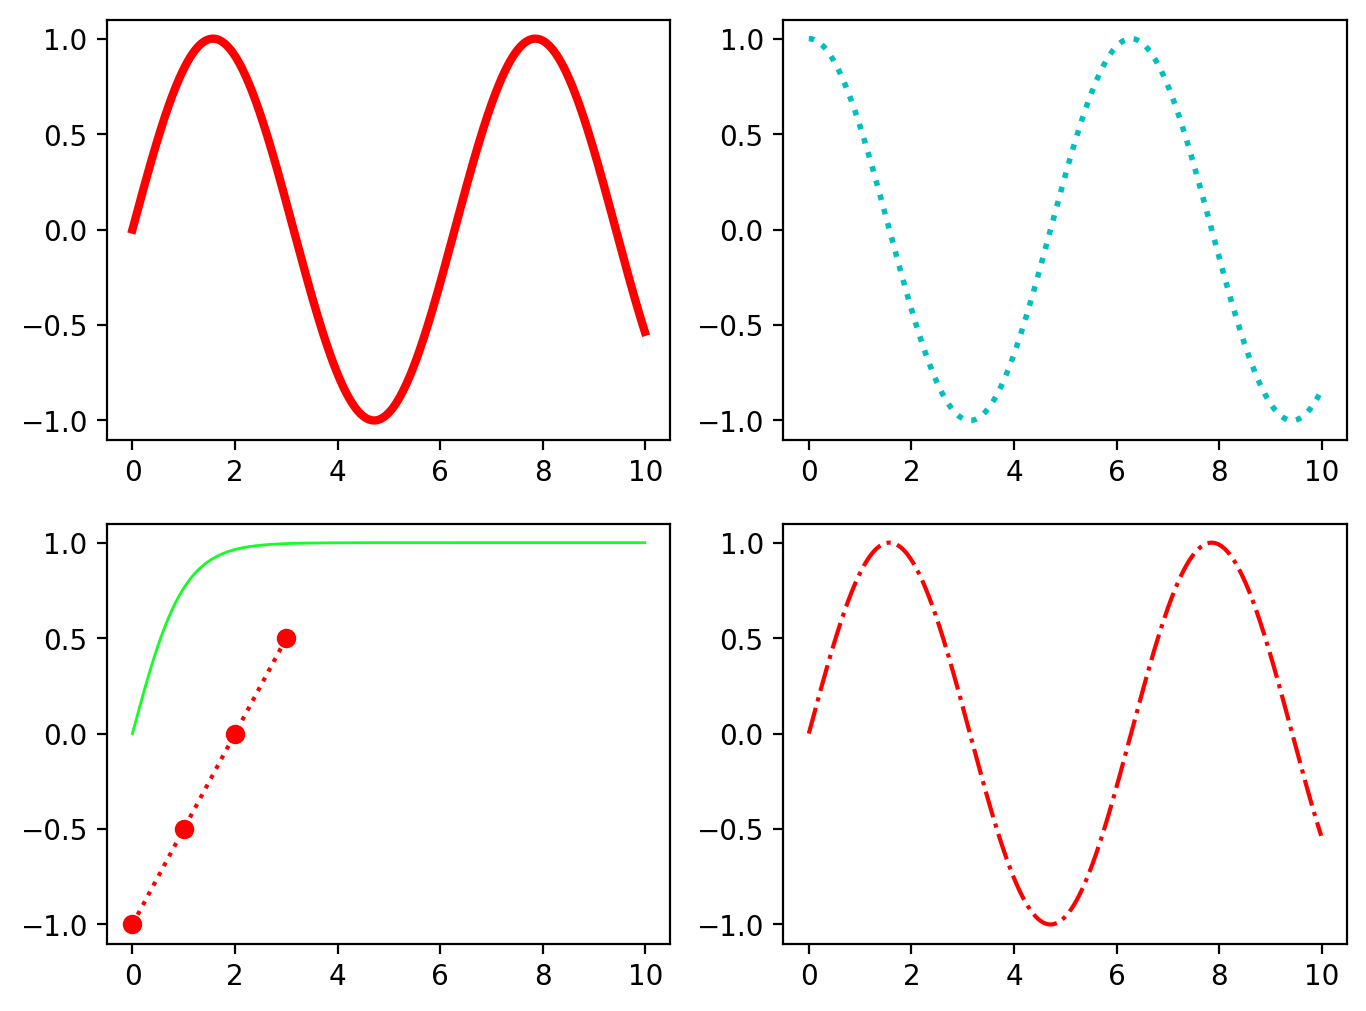

In [36]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=3)
axes[0,1].plot(x, np.cos(x), 'c:', linewidth=2) # color='c', linestyle=':', '--', '-'
axes[1,0].plot([0,1,2,3],[-1,-0.5, 0, 0.5], 'ro:') # color='r', marker='o'
axes[1,0].plot(x, np.tanh(x), '#11FF22',linewidth=1)
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show

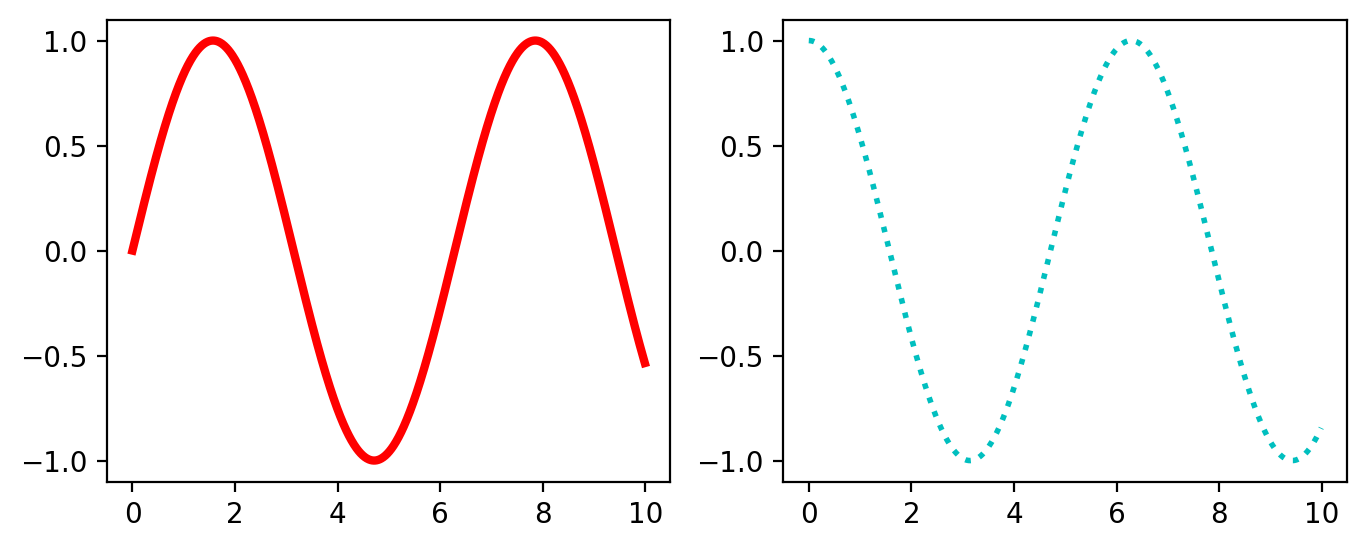

In [40]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

axes[0].plot(x, np.sin(x), 'r', linewidth=3)
axes[1].plot(x, np.cos(x), 'c:', linewidth=2) # color='c', linestyle=':', '--', '-'

### 3) pandas.DataFrame.plot()
- plt.plot(x,y,fmt)
- df.plot(x=열이름, y=열이름, kind='line' figsize, title, xlim, ylim, ...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density, ...
    * xlim, ylim : list/tuple

In [42]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,virginica


범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

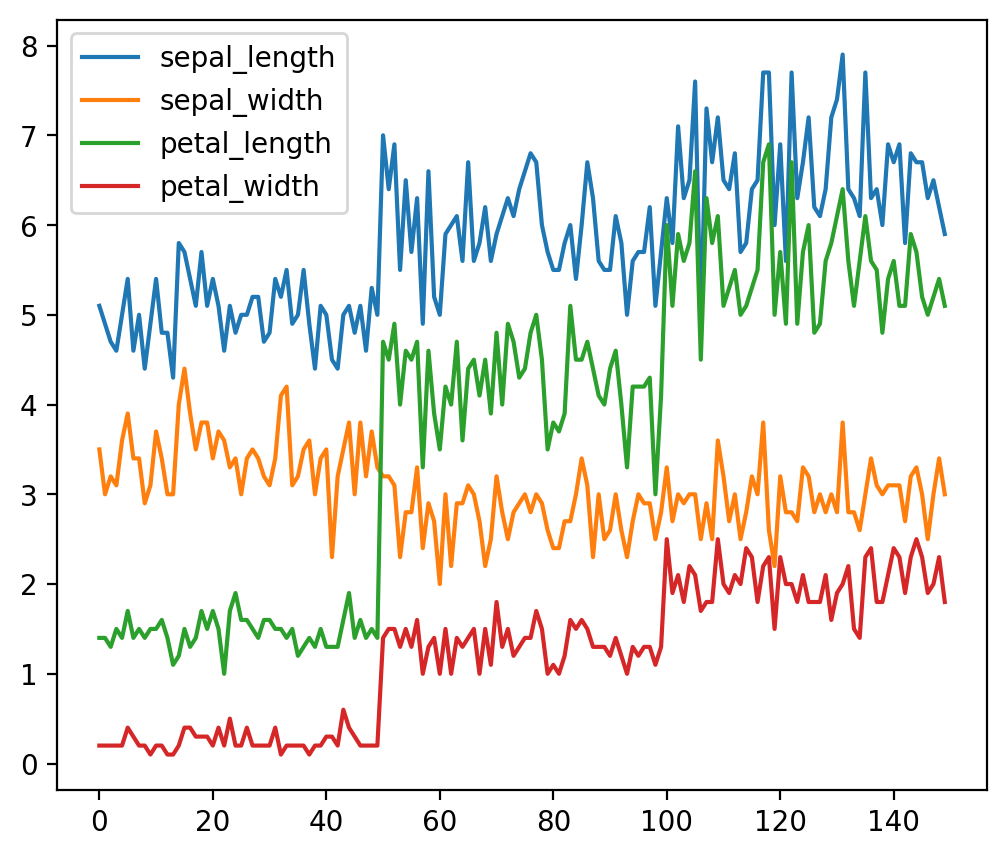

In [61]:
iris.plot(kind='line', figsize=(6,5))
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#plt.savefig('data/ch12_iris.jpg')

In [62]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


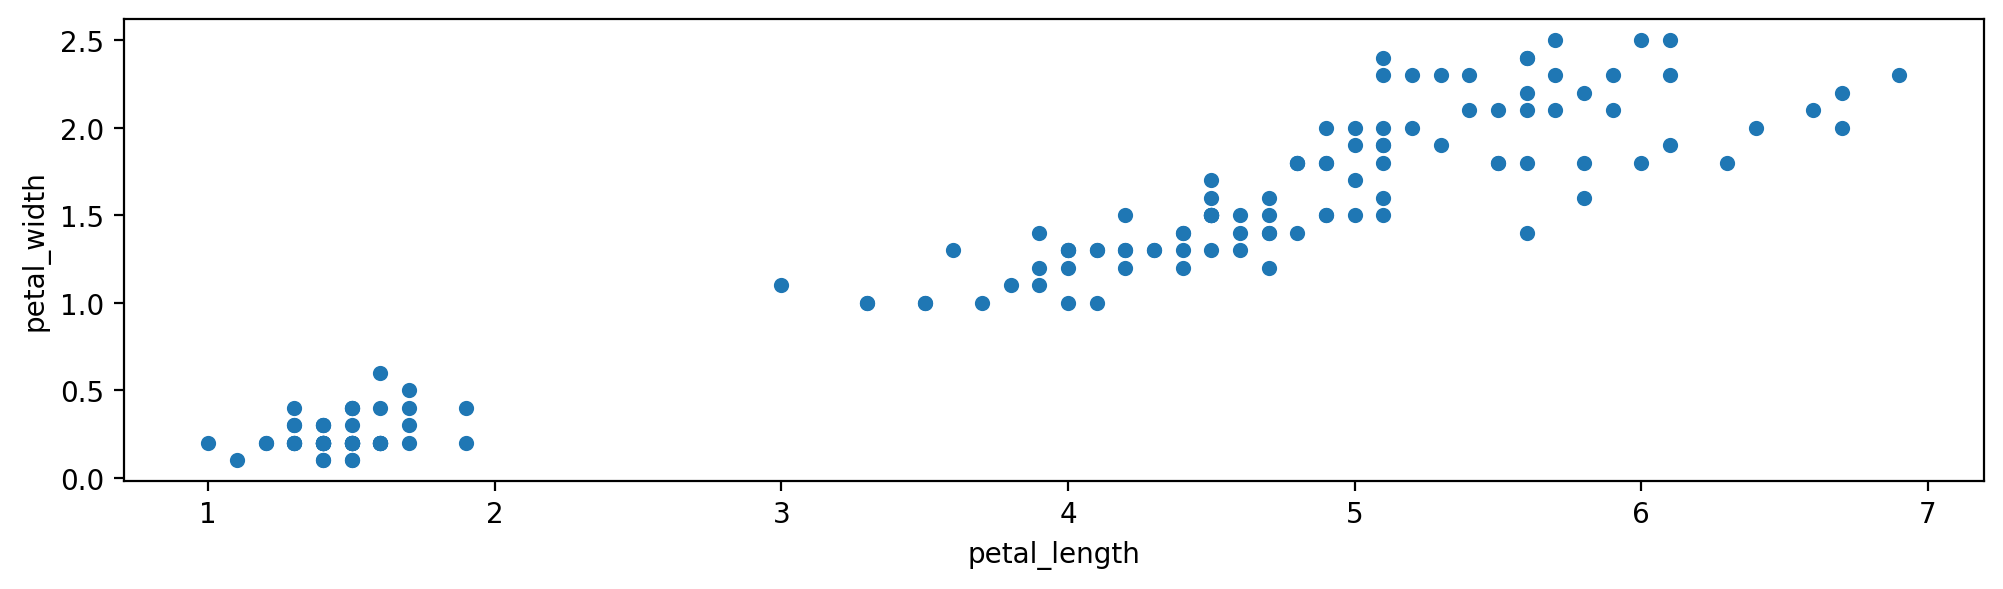

In [66]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

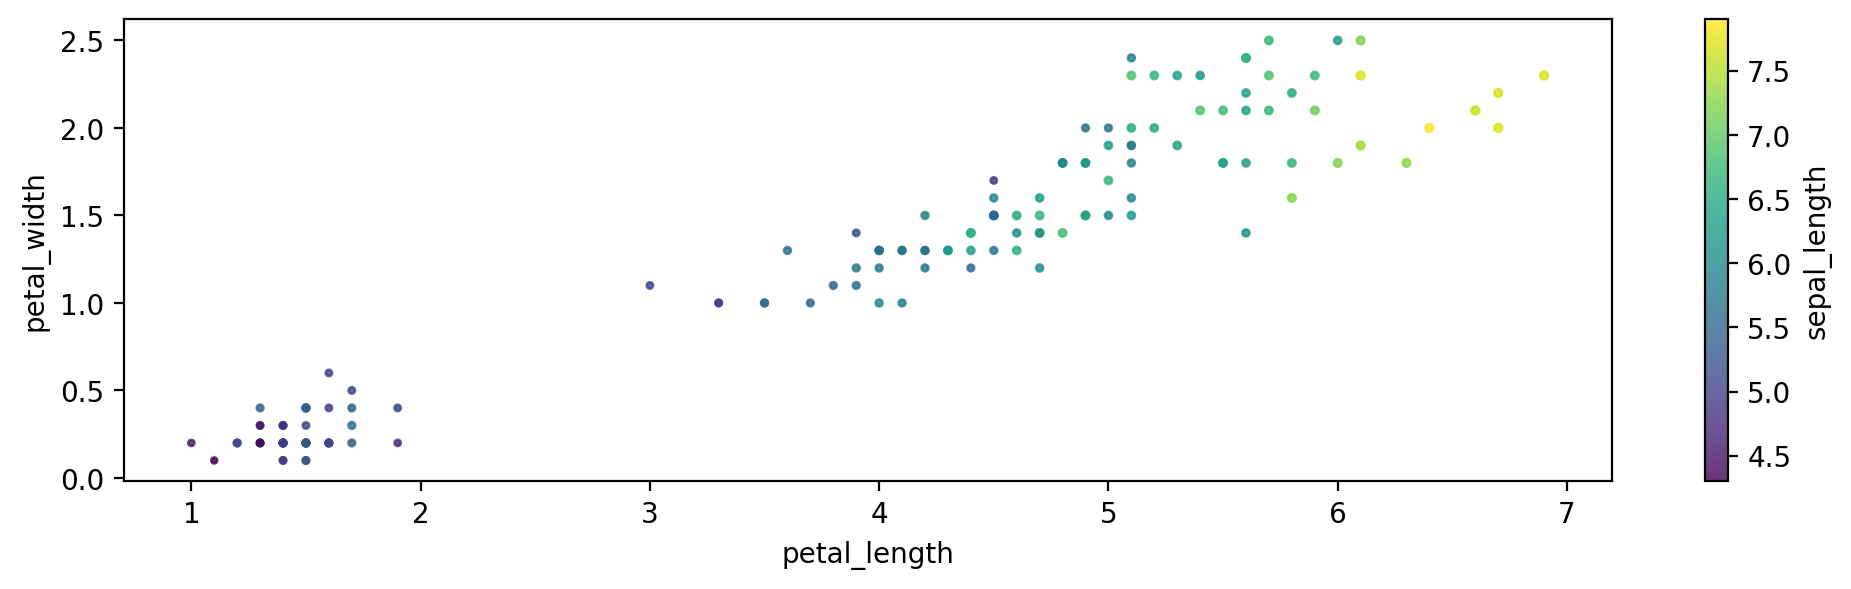

In [69]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length', # size
         c='sepal_length', # color
         alpha=.8)  # 0<=투명도<=1
plt.show()

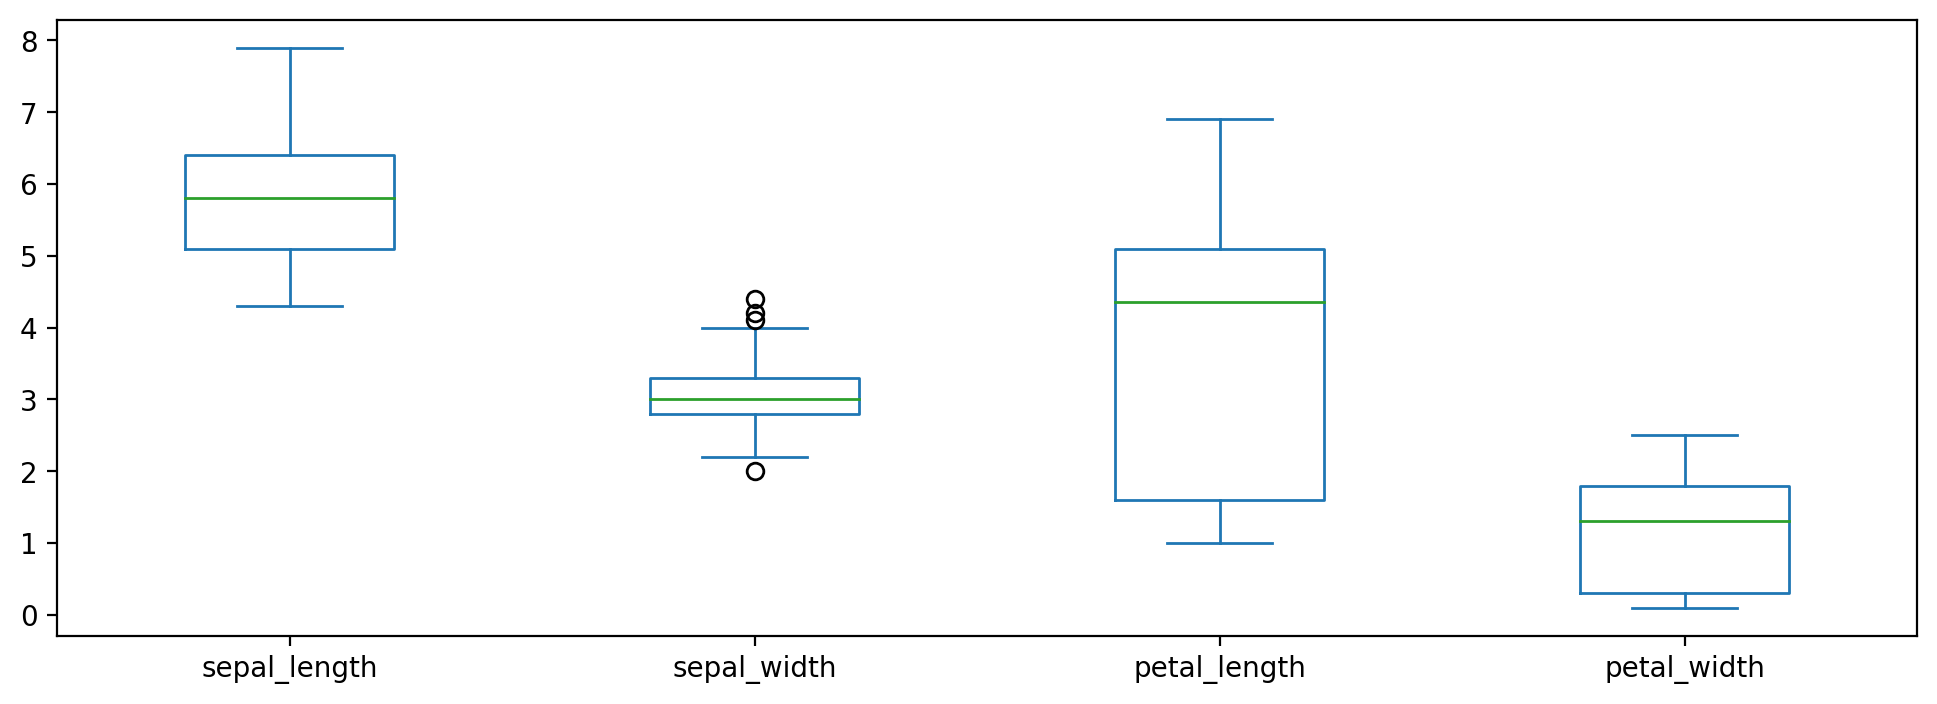

In [76]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(12,4))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

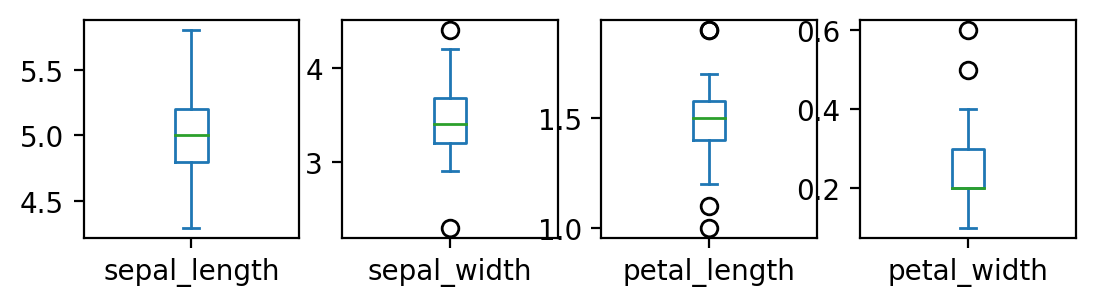

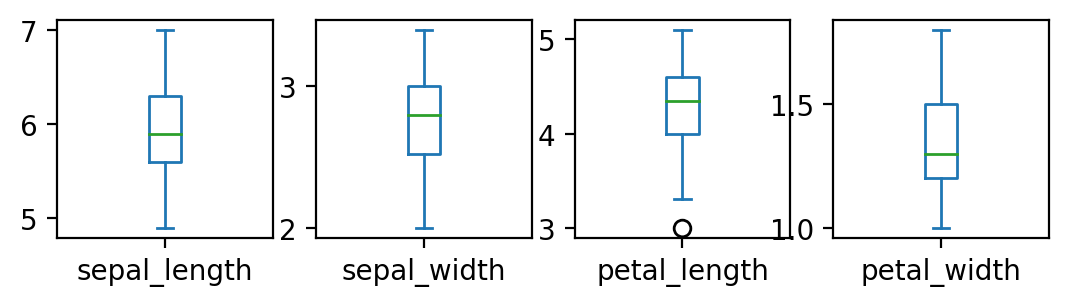

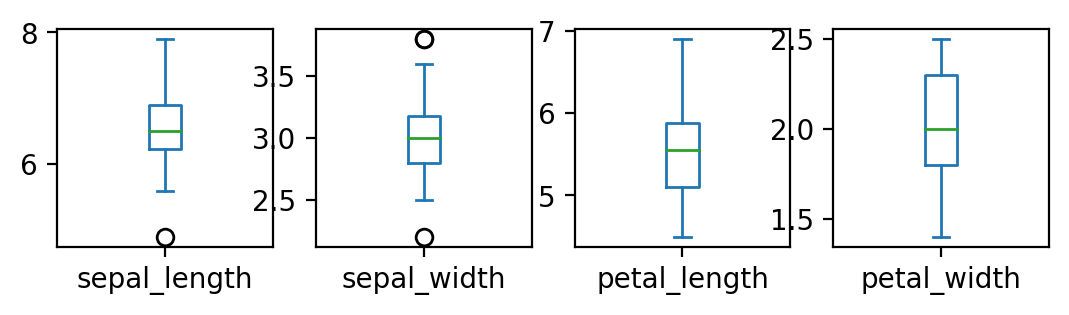

In [83]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharex=True)
plt.show

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 1) plt.scatter() : 산점도

<function matplotlib.pyplot.show(close=None, block=None)>

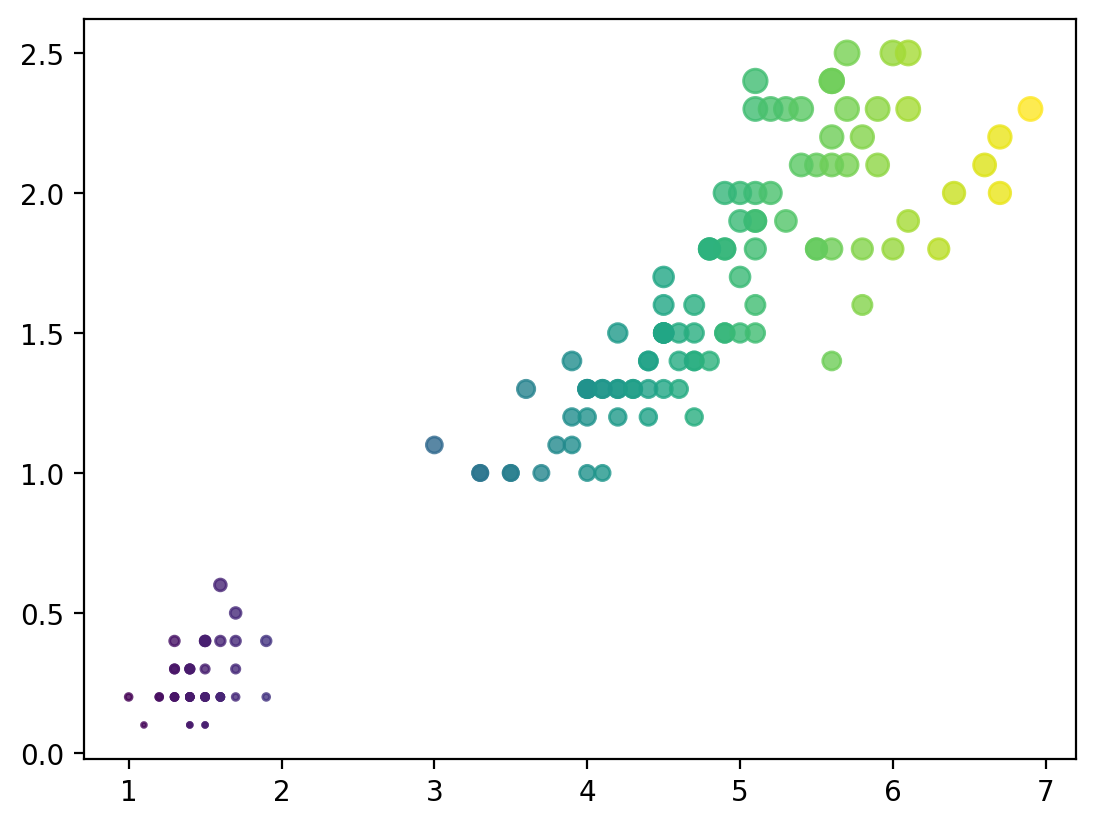

In [85]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, # color
           alpha=.8)
plt.show

### 2) boxplot(단점: 분포를 몰라). violinplot()

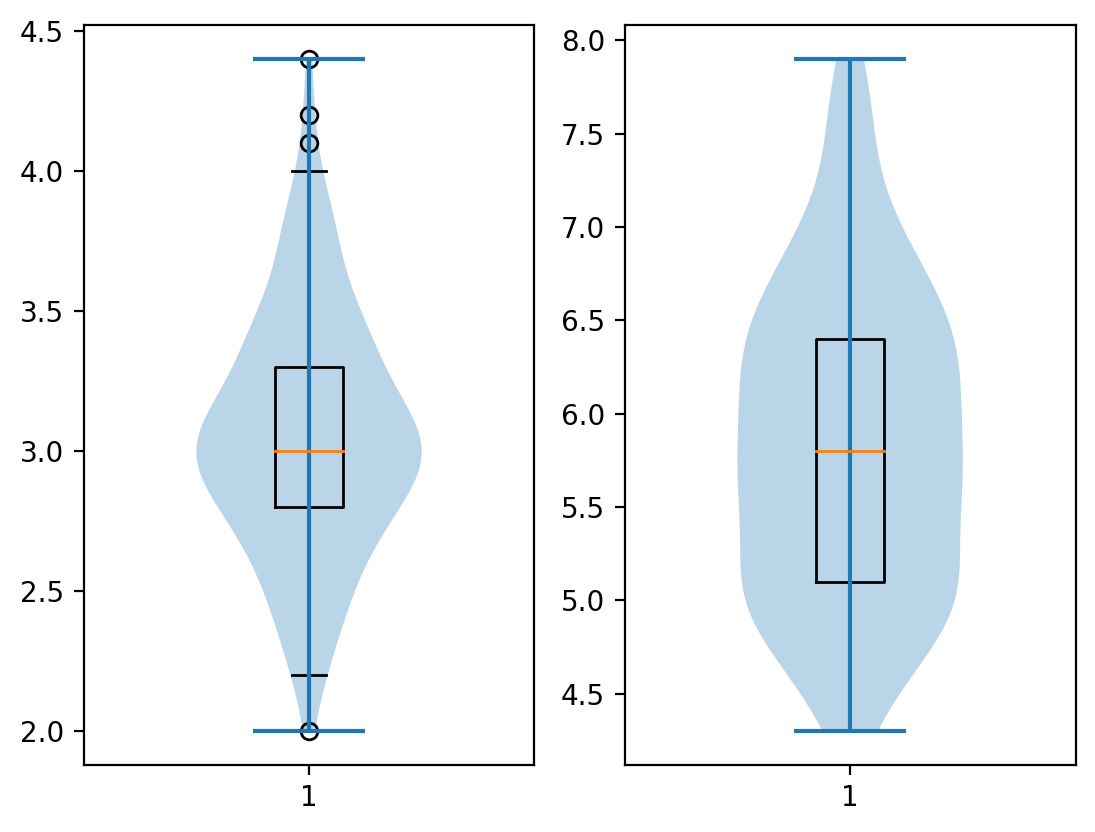

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[0].violinplot(iris.sepal_width)
axes[1].boxplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

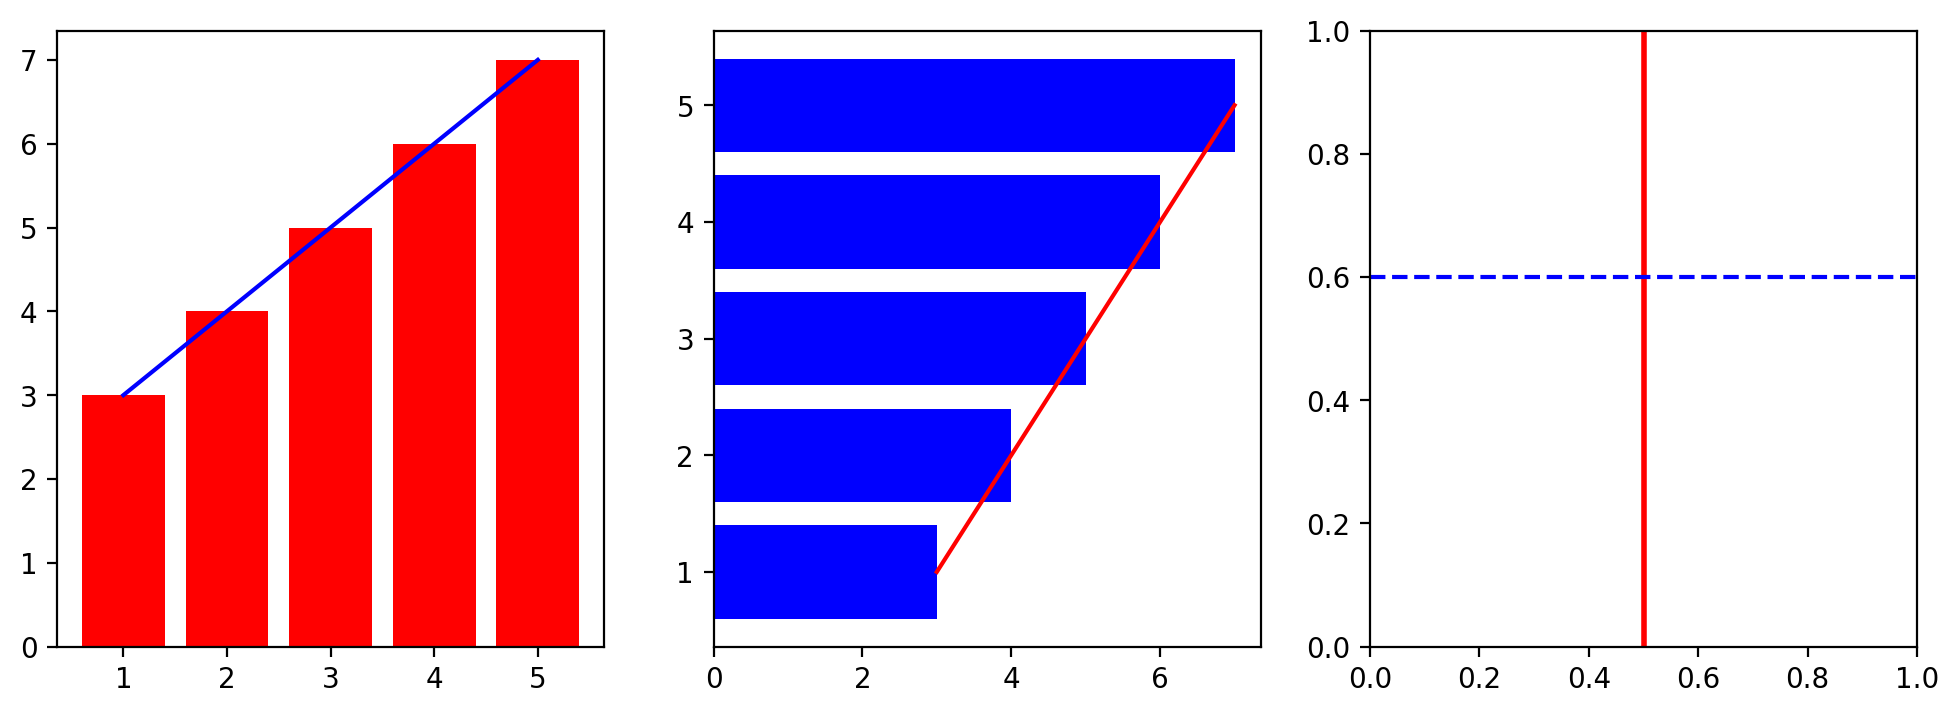

In [102]:
x=[1,2,3,4,5]
y=[3,4,5,6,7]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
axes[0].bar(x,y, color='r')
axes[0].plot(x,y, color='b')
axes[1].barh(x,y, color='b')
axes[1].plot(y,x, color='r')
axes[2].axvline(0.5, c='r', linewidth=2)
axes[2].axhline(0.6, c='b', linestyle='--')

### 4) hist(도수분포표: histogram)

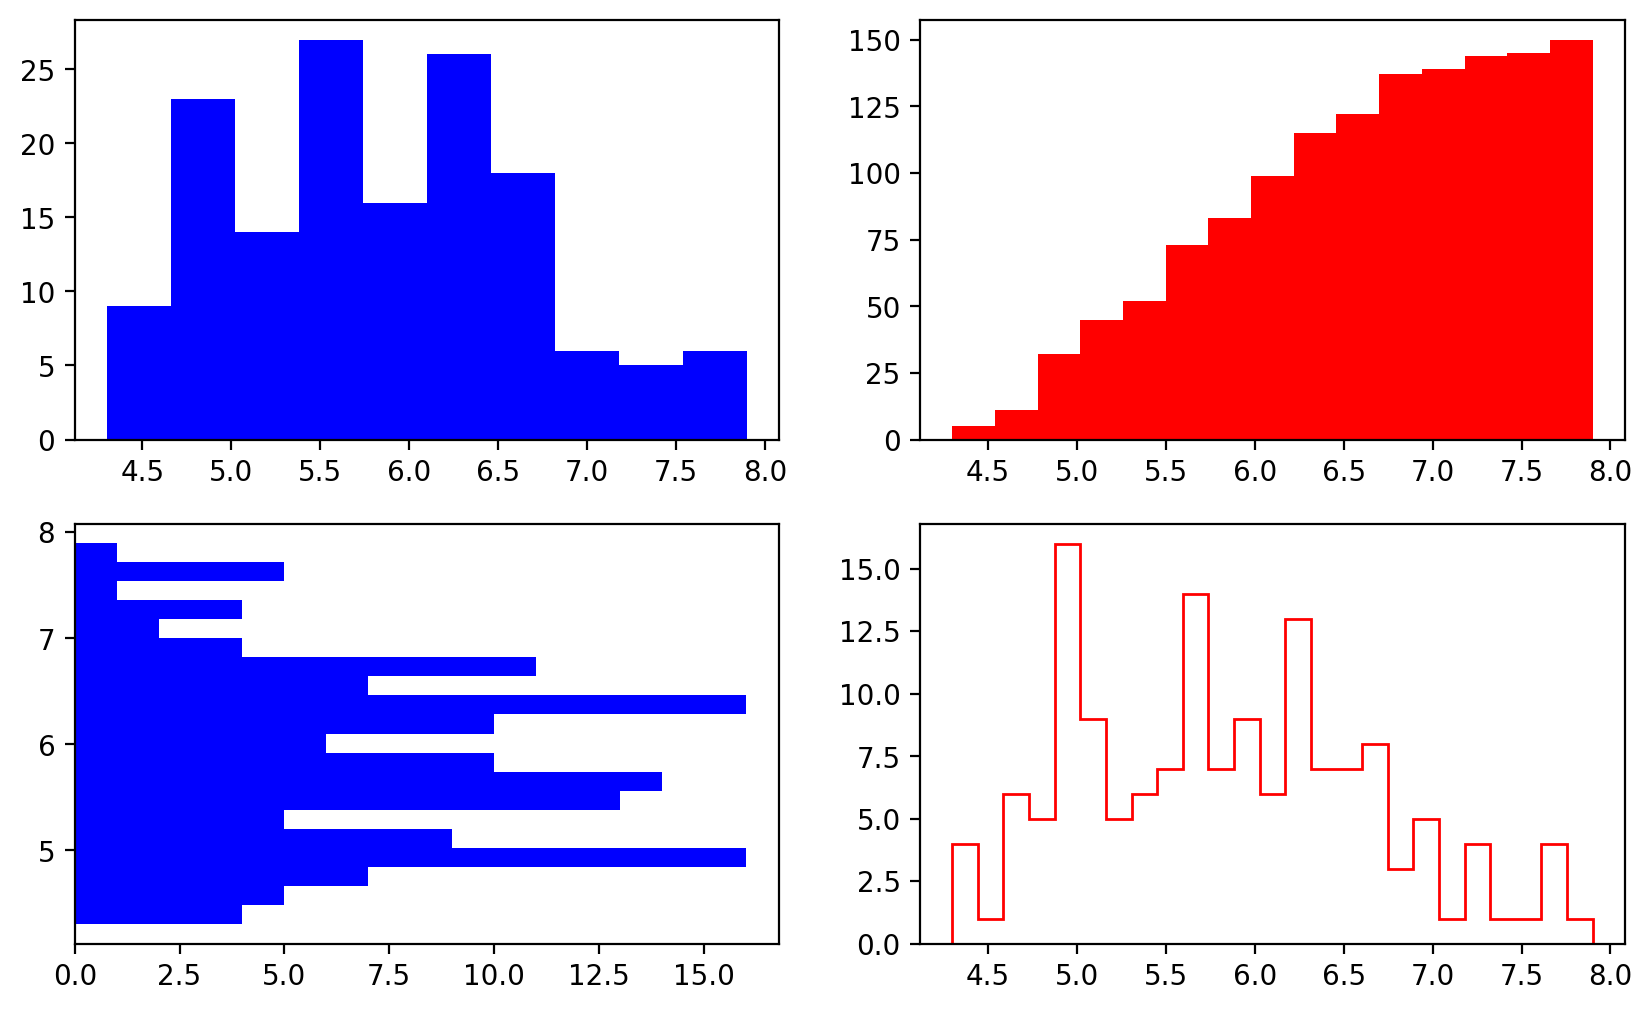

In [105]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=10, color='b') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=15, color='r', cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, color='b', orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=25, color='r', histtype='step') # 계단형(?)
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestype, linewidth, color, marker, ... (plot의 매개변수로 지정)
### 2) text(), annotate()

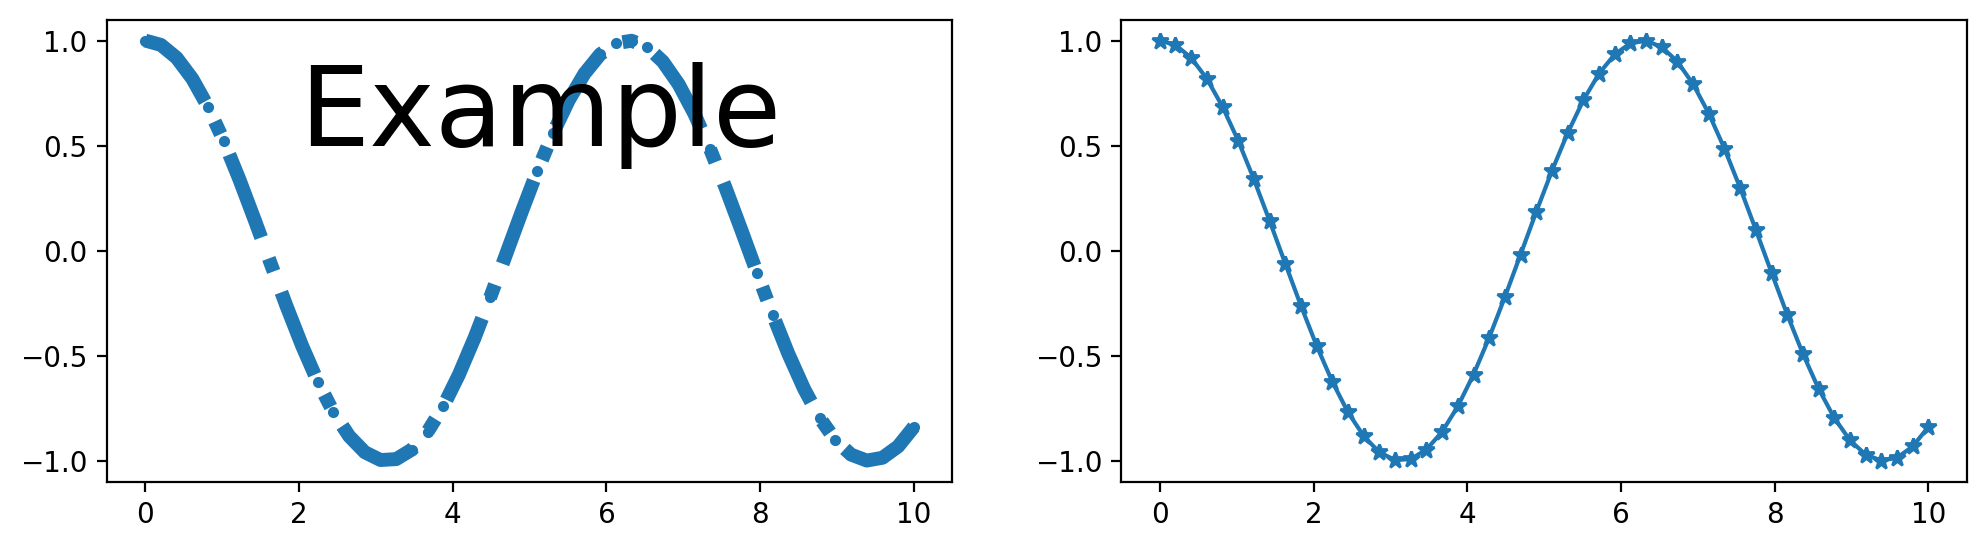

In [110]:
x = np.linspace(0,10) # num=50 default
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x,y, marker='.', linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, 'Example', fontsize=40)
axes[1].plot(x,y, marker='*')
plt.show